In [1]:
import seaborn as sns

# Used for Confusion Matrix
from sklearn import metrics

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn import preprocessing

from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [7]:
path = "."
#path = "/Users/willemvandemierop/Documents/Master AI/Introduction to AI/Coursework"
filename_read = os.path.join(path, "All_data_patients_correct.csv")
patient_all = pd.read_csv(filename_read)
PAL = patient_all
print("All patients\n", PAL.head())
PAL = shuffle(PAL)
print("All patients shuffled\n",PAL.head())
print("Patients data size", PAL.shape)

min_max_scaler = preprocessing.MinMaxScaler()
PAL[['heartbeat']] = min_max_scaler.fit_transform(PAL[['heartbeat']].values)

print("\nPatients data normalized heartbeat\n", PAL.head())

result = []
for x in PAL.columns:
    if x != 'label':
        result.append(x)

X = PAL[result].values
#X = np.delete(X,0,1)
y = PAL['label'].values
print("X data \n", X[0:5])


All patients
     time         x         y         z  heartbeat  label
0    0.0  0.184021  0.679169 -0.476990       87.0     -1
1   30.0 -0.301010  0.805710  0.487167       95.0     -1
2   60.0 -0.323517  0.923447  0.146362       84.0     -1
3   90.0 -0.509674  0.855102 -0.049118       85.0     -1
4  120.0 -0.387756  0.919067  0.023758       82.0     -1
All patients shuffled
           time         x         y         z  heartbeat  label
5868    9660.0  0.322189 -0.001083 -0.947906       52.0      2
14291  20280.0 -0.444885  0.300842 -0.832092       73.0      5
7785    8010.0 -0.172714  0.108078 -0.972321       49.0      3
24678  16380.0 -0.490692  0.021942 -0.856262       59.0      0
19845  14640.0 -0.264831 -0.360031 -0.891602       59.0      5
Patients data size (25781, 6)

Patients data normalized heartbeat
           time         x         y         z  heartbeat  label
5868    9660.0  0.322189 -0.001083 -0.947906   0.123596      2
14291  20280.0 -0.444885  0.300842 -0.832092   0.3

In [8]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.05)
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
from sklearn.svm import SVC
from sklearn.utils import shuffle



from sklearn.linear_model import LogisticRegression 
result = []

first_patient = PAL
first_patient = shuffle(first_patient)
#first_patient = first_patient.reindex(np.random.permutation(first_patient.index))

#print(first_patient.head())

for x in first_patient:
    if x != 'label':
        result.append(x)
        
    
X = first_patient[result].values
print(X)

y = first_patient['label'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
y_train[y_train == -1] = 6
y_test[y_test == -1] = 6
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

[[ 8.88e+03  2.75e-01  3.00e-01  9.21e-01  4.16e-01]
 [ 1.86e+03 -5.90e-02 -3.56e-01 -9.25e-01  4.04e-01]
 [ 2.58e+04 -2.90e-01 -1.10e-01  9.49e-01  2.58e-01]
 ...
 [ 2.40e+02 -2.45e-01  6.06e-01 -7.57e-01  1.91e-01]
 [ 1.43e+04 -3.48e-01 -8.45e-02 -9.24e-01  2.58e-01]
 [ 1.20e+04 -4.35e-01  4.52e-01 -7.68e-01  3.48e-01]]


In [10]:
#logisticRegr = LogisticRegression(random_state=0, multi_class='ovr')#,max_iter = 1000,solver = 'sag')#,solver = 'sag',penalty = 'l2', C = 0.0001)
logisticRegr = LogisticRegression(multi_class = 'ovr',tol = 1e-5,max_iter = 1000)
logisticRegr.fit(X_train, y_train)



y_pred = logisticRegr.predict(X_test)
print(y_pred)
score = logisticRegr.score(X_test, y_test)
print('test',score)
print('train',logisticRegr.score(X_train, y_train))



C:\Users\damie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[6 3 2 ... 5 6 5]
test 0.2443280977312391
train 0.3480574239534183


The accuracy is:  24.43280977312391 %
   Actual  Predicted
0       3          6
1       2          3
2       2          2
3       2          2
4       6          5
Accuracy: 0.24
Confusion matrix, without normalization
[[  9  16  26  45  95 105 126]
 [  7  15  68  36  61 109  44]
 [ 38 159 443 265 417 822 333]
 [  0  42  45 123 153  54 207]
 [  0   0  10  21  36   0   3]
 [ 23  62 176 103 128 584  80]
 [  0   0   0   1   5  12  50]]
Normalized confusion matrix
[[0.02 0.04 0.06 0.11 0.23 0.25 0.3 ]
 [0.02 0.04 0.2  0.11 0.18 0.32 0.13]
 [0.02 0.06 0.18 0.11 0.17 0.33 0.13]
 [0.   0.07 0.07 0.2  0.25 0.09 0.33]
 [0.   0.   0.14 0.3  0.51 0.   0.04]
 [0.02 0.05 0.15 0.09 0.11 0.51 0.07]
 [0.   0.   0.   0.01 0.07 0.18 0.74]]


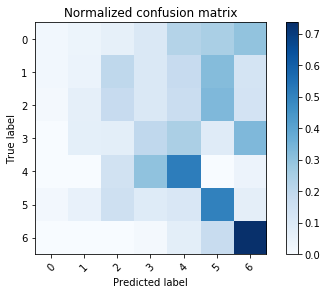

In [11]:
labels = {0 : "wake", 1: "N1", 2: "N2", 3: "N3",4:"Noise", 5 : "REM",6:"Noise"}

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)

#accuracy = cross_validate(Random_Forest_model,X,Y,cv=5)['test_score']
print('The accuracy is: ',accuracy*100,'%')
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head()
print(df_compare)

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print('Confusion matrix, without normalization')
print(cm)
#normalised confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized,labels, title='Normalized confusion matrix')
plt.show()